# ml_10
## SVM 정규화

- SVM 과 선형회귀, 선형분류 에서는 정규화 작업이 꼭 필요하다
- 앞의 Iris 데이터에서는 값들의 범위가 비슷하여 정규화를 하지 않아도 되었을 뿐이다

In [1]:
%pylab inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

Populating the interactive namespace from numpy and matplotlib


In [2]:
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target)

In [3]:
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

X_train_scaled = (X_train-X_mean)/X_std
X_test_scaled = (X_test-X_mean)/X_std

X_train_scaled.shape, X_test_scaled.shape

((426, 30), (143, 30))

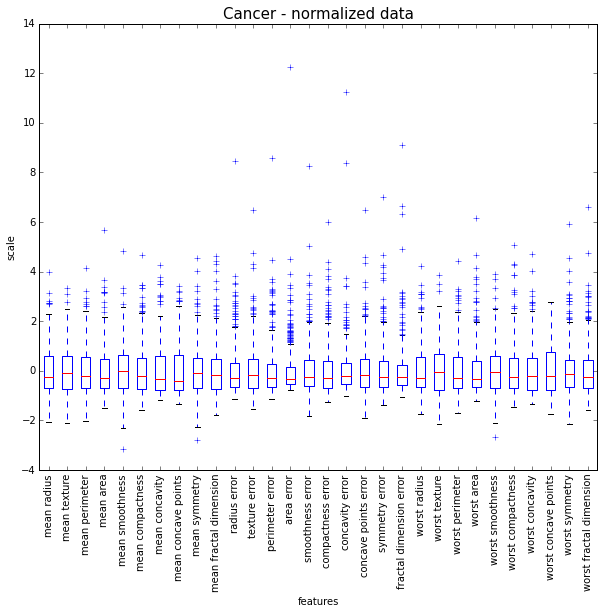

In [4]:
fig=plt.figure(figsize=[10,8])
plt.title('Cancer - normalized data',fontsize=15)
plt.boxplot(X_train_scaled)
plt.xticks(np.arange(30)+1,cancer.feature_names,rotation=90)
plt.xlabel('features')
plt.ylabel('scale')
print('')

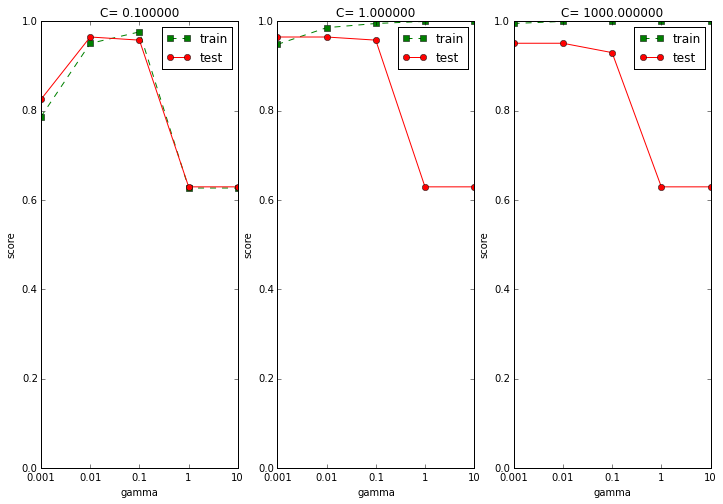

In [22]:
C=[0.1,1,1000]
gamma=[0.001,0.01,0.1,1,10]
s_train=[]
s_test=[]

for c in C:
    s1=[]
    s2=[]
    
    for g in gamma:
        model=SVC(C=c,gamma=g)
        model.fit(X_train_scaled,y_train)

        pred_y=model.predict(X_test_scaled)
        s1.append(model.score(X_train_scaled,y_train))
        s2.append(model.score(X_test_scaled,y_test))
        
    s_train.append(s1)
    s_test.append(s2)
    
fig=figure(figsize=[12,8])
for i in range(len(C)):
    plt.subplot(1,len(C),i+1)
    plt.plot(s_train[i],'gs--',label='train')
    plt.plot(s_test[i],'ro-',label='test')
    plt.title('C= %f' % (C[i]))
    plt.xticks(range(len(gamma)),gamma)
    plt.ylim(0,1)
    plt.xlabel('gamma')
    plt.ylabel('score')
    plt.legend()